In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [4]:
dataset = pd.read_csv('heart.csv')
dataset


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
dataset.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
dataset.duplicated().sum()

1

In [8]:
dataset.drop_duplicates(inplace=True)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


# Understanding the data


In [10]:
cat =["sex","cp","fbs","restecg","exang","slope","thal"]
num =["age","trestbps","chol","thalach","oldpeak"]


In [11]:
print (f' We have {dataset.shape[0]} instances with the {dataset.shape[1]-1} features and 1 target variable')

 We have 302 instances with the 13 features and 1 target variable


In [12]:
def missing (dataset):
    missing_number = dataset.isnull().sum().sort_values(ascending=False)
    missing_percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(dataset)

,Missing_Number,Missing_Percent
age,0,0.0
sex,0,0.0
cp,0,0.0
trestbps,0,0.0
chol,0,0.0
fbs,0,0.0
restecg,0,0.0
thalach,0,0.0
exang,0,0.0
oldpeak,0,0.0


In [13]:
print(dataset.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [14]:
dataset[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [15]:
dataset[num].skew()

age        -0.203743
trestbps    0.716541
chol        1.147332
thalach    -0.532671
oldpeak     1.266173
dtype: float64

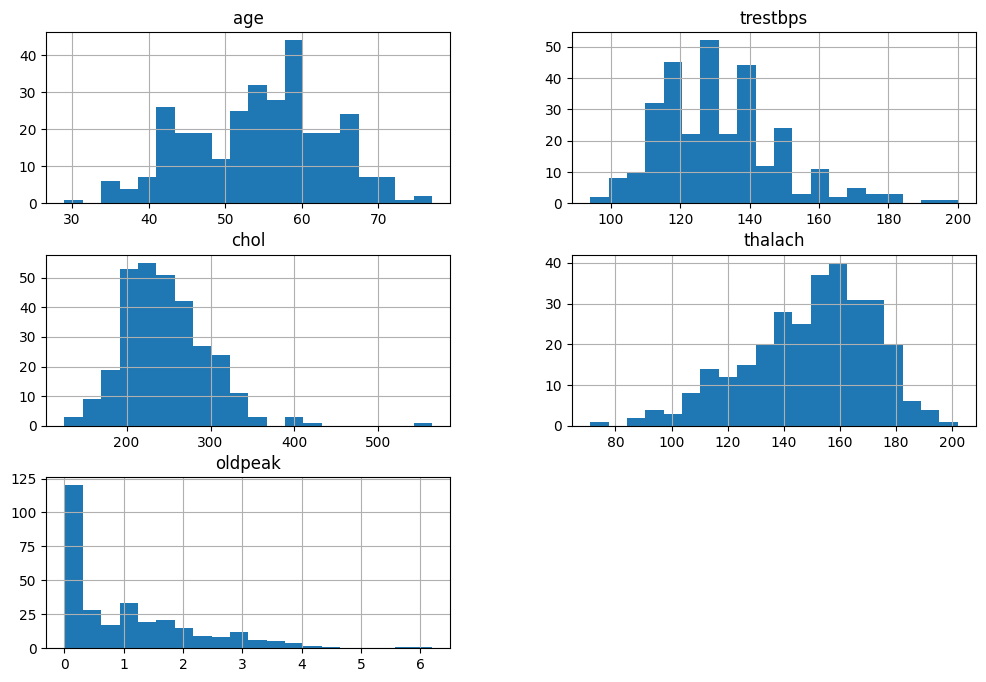

In [16]:
dataset[num].hist(figsize=(12,8),bins=20);

In [17]:
for i in cat:
    print("="*30)
    print(dataset[i].value_counts())
    print("="*30)

1    206
0     96
Name: sex, dtype: int64
0    143
2     86
1     50
3     23
Name: cp, dtype: int64
0    257
1     45
Name: fbs, dtype: int64
1    151
0    147
2      4
Name: restecg, dtype: int64
0    203
1     99
Name: exang, dtype: int64
2    141
1    140
0     21
Name: slope, dtype: int64
2    165
3    117
1     18
0      2
Name: thal, dtype: int64


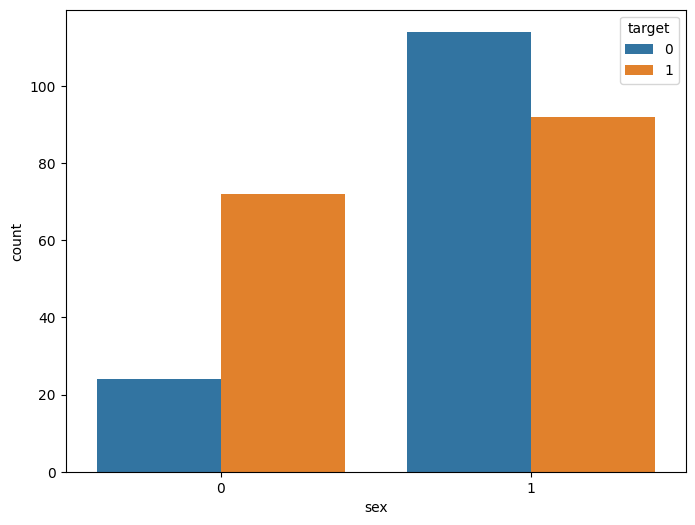

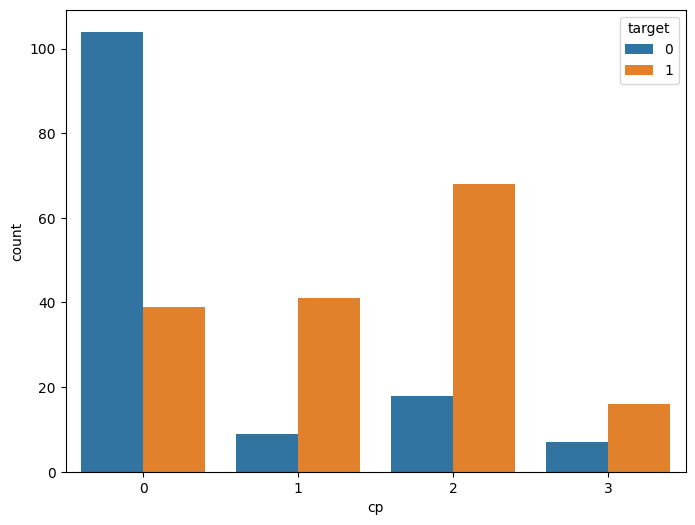

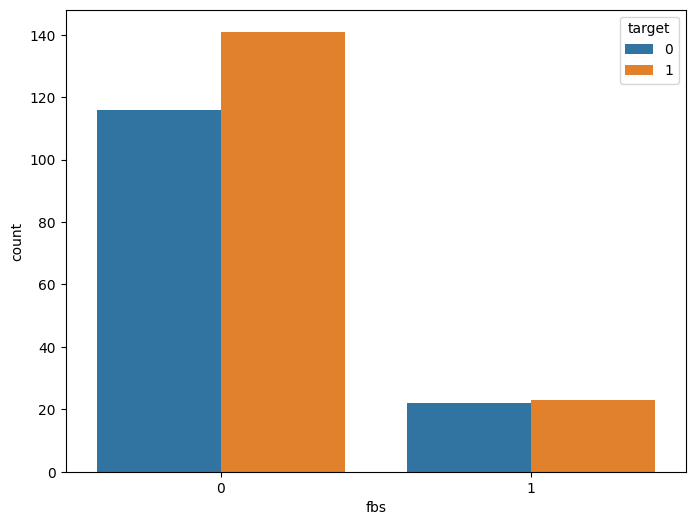

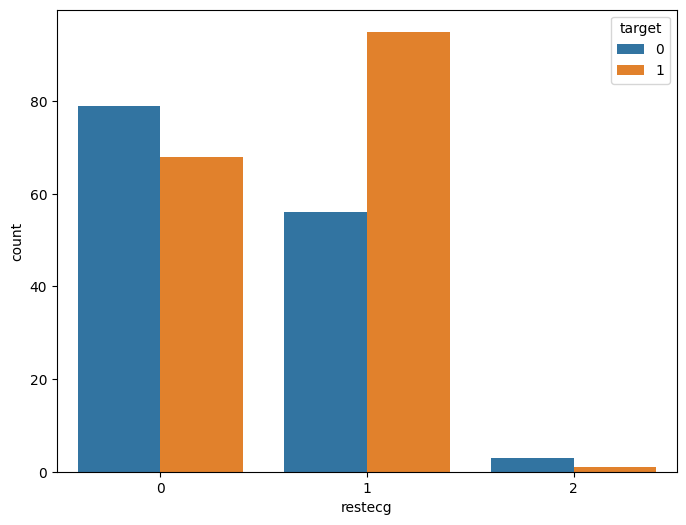

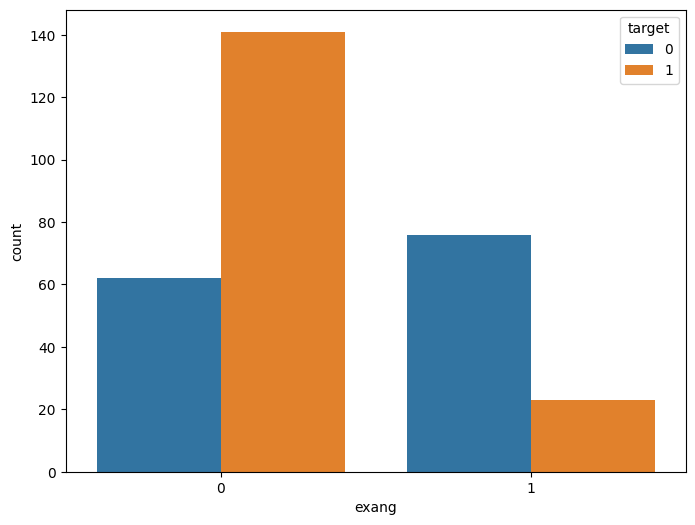

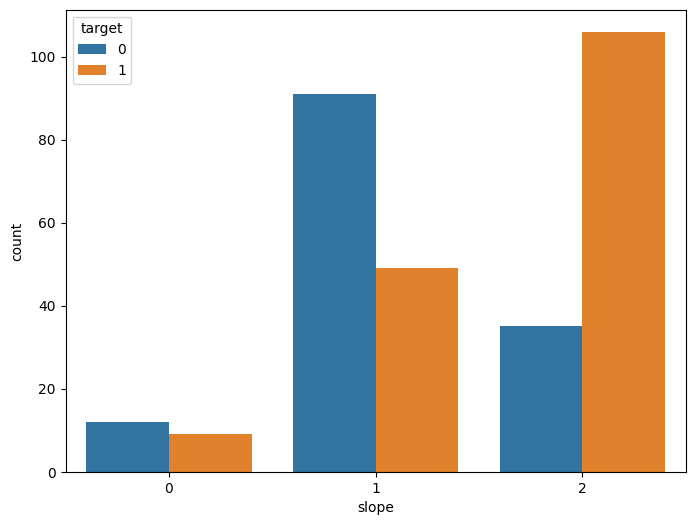

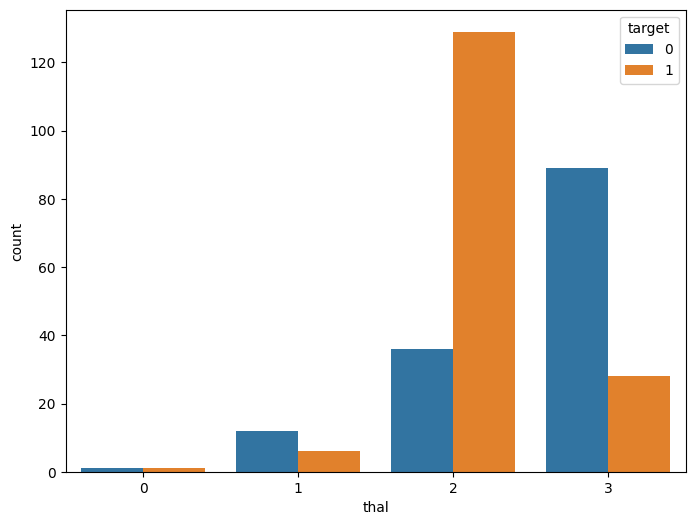

In [18]:
for i in cat:
    plt.figure(figsize=(8,6))
    sns.countplot(data=dataset, x=i, hue="target")


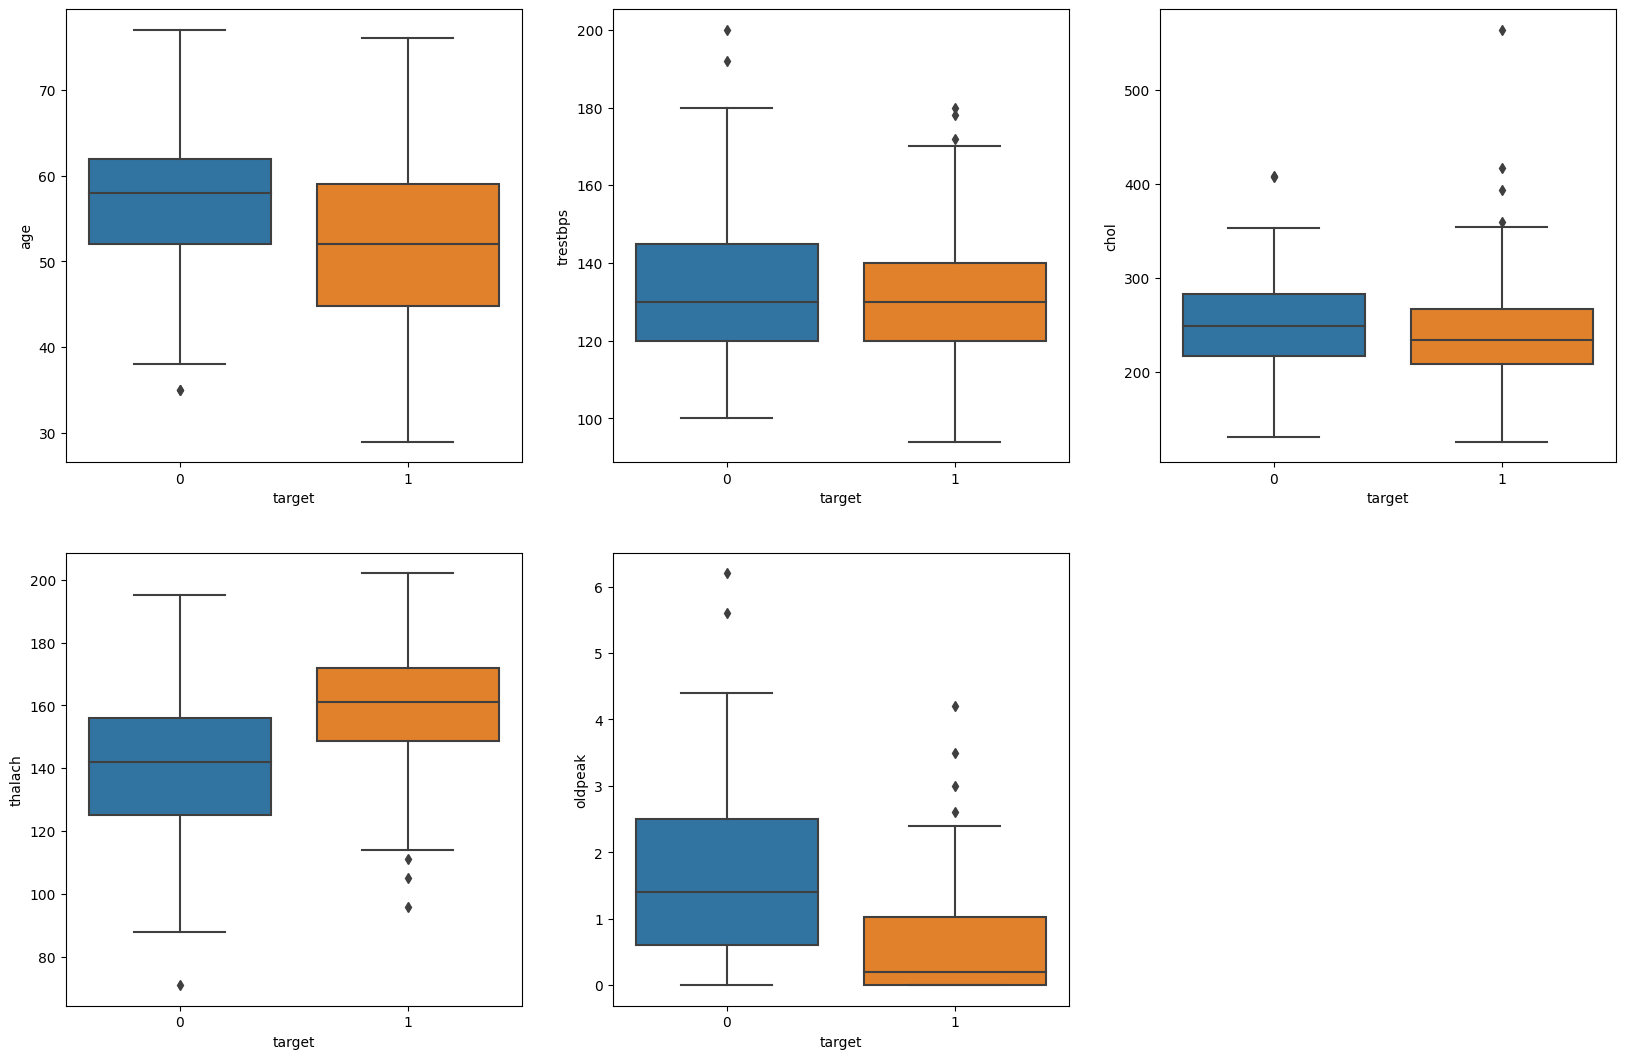

In [19]:
index = 0
plt.figure(figsize=(20,20))
for feature in dataset[num]:
    if feature != "target":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='target',y=feature,data=dataset)

In [20]:
y = dataset['target']
print(f'Percentage of patient had a stroke: % {round(y.value_counts(normalize=True)[1]*100,2)} --> ({y.value_counts()[1]} patient)')
print(f'Percentage of patient did not have a stroke: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} patient)')

Percentage of patient had a stroke: % 54.3 --> (164 patient)
Percentage of patient did not have a stroke: % 45.7 --> (138 patient)


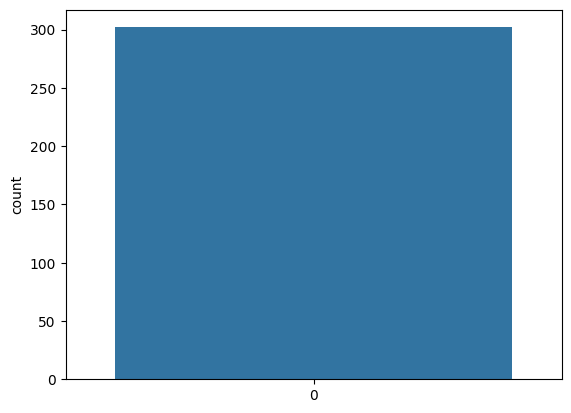

In [21]:
sns.countplot(dataset["target"]);

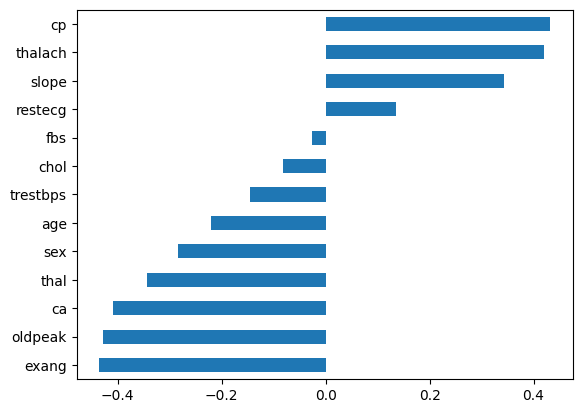

In [22]:
dataset.corr()["target"].drop("target").sort_values().plot.barh();

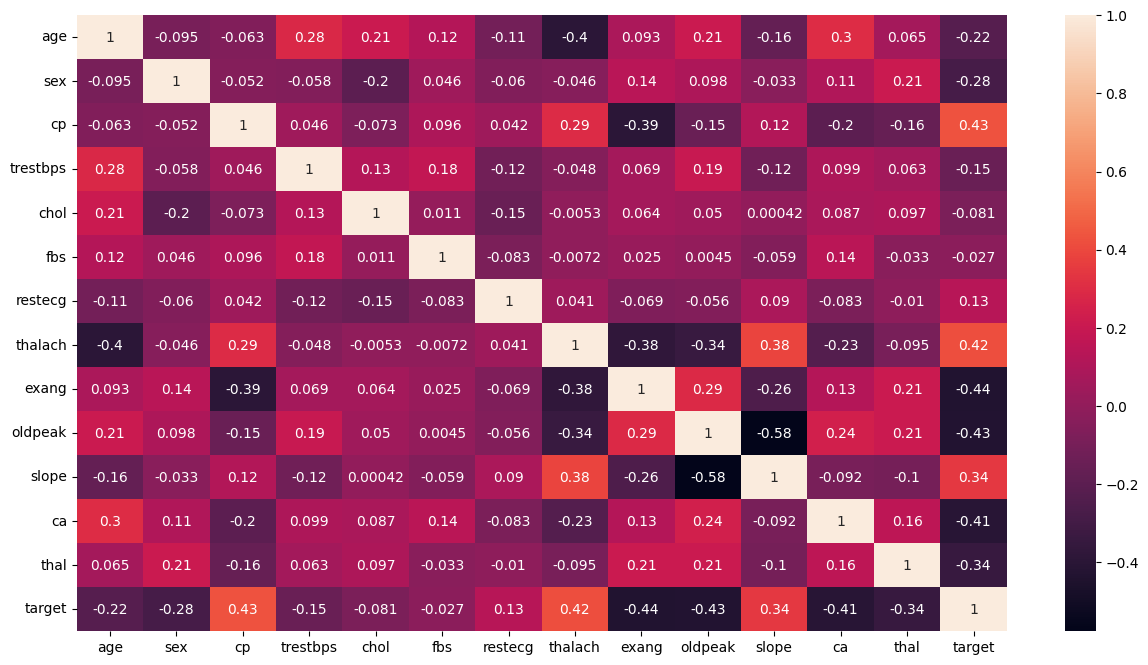

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(), annot=True);

#Data processing
After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. First, I'll use the get_dummies method to
create dummy columns for categorical variables.

In [24]:
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])


Now, I will use the StandardScaler from sklearn to scale my dataset.

In [25]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [26]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)


In [27]:
knn_scores = []
for k in range(1,21):
 knn_classifier = KNeighborsClassifier(n_neighbors = k)
 knn_classifier.fit(X_train, y_train)
 knn_scores.append(knn_classifier.score(X_test, y_test))



Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

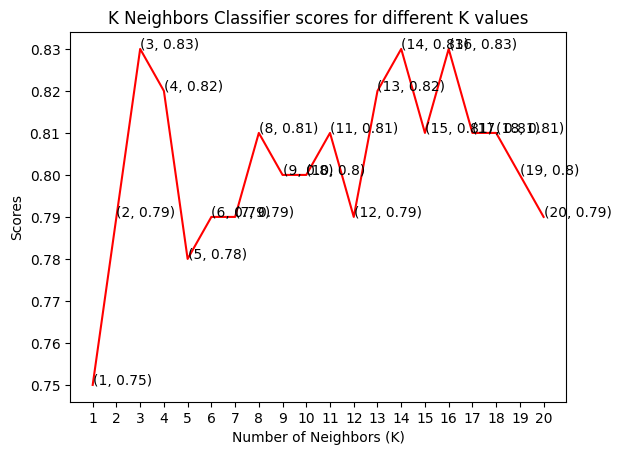

In [28]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
 plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')


from the plot above, it is clear that the maximum score achieved was 0.87 for the 8 neighbors.


In [29]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[7]*100, 8))


The score for K Neighbors Classifier is 81.0% with 8 nieghbors.


#Support vector Classifier
There are several kernels for Support Vector Classifier. I'll test some of them and check which has the best score.

In [30]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
 svc_classifier = SVC(kernel = kernels[i])
 svc_classifier.fit(X_train, y_train)
 svc_scores.append(svc_classifier.score(X_test, y_test))


I'll now plot a bar plot of scores for each kernel and see which performed the best.


Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

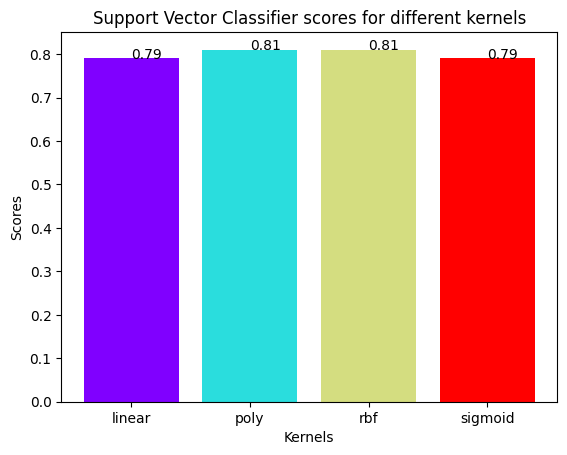

In [31]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
 plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')


The linear kernel performed the best, being slightly better than rbf kernel.

In [32]:

print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[0]*100, 'linear'))

The score for Support Vector Classifier is 79.0% with linear kernel.


#Decision Tree Classifier
Here, I'll use the Decision Tree Classifier to model the problem at hand. I'll vary between a set of max_features and see which returns the best accuracy.

In [33]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
 dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
 dt_classifier.fit(X_train, y_train)
 dt_scores.append(dt_classifier.score(X_test, y_test))

I selected the maximum number of features from 1 to 30 for split. Now, let's see the scores for each of those cases.

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

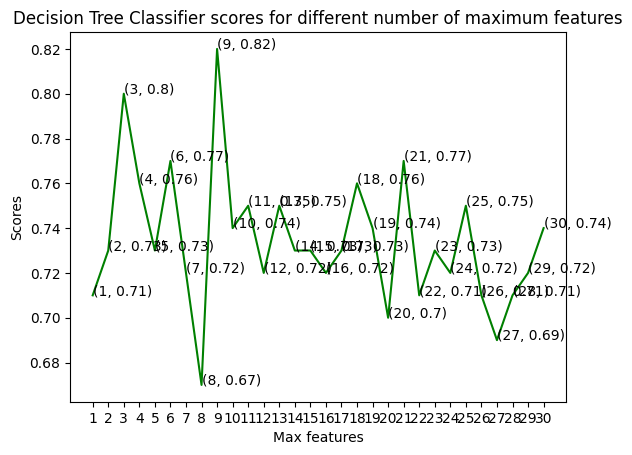

In [34]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
 plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

The model achieved the best accuracy at three values of maximum features, 2 , 4 and 18 .

In [35]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[17]*100, [2,4,18]))


The score for Decision Tree Classifier is 76.0% with [2, 4, 18] maximum features.


#Random Forest Classifier
Now, I'll use the ensemble method, Random Forest Classifier, to create the model and vary the number of estimators to see their effect.



In [36]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
 rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
 rf_classifier.fit(X_train, y_train)
 rf_scores.append(rf_classifier.score(X_test, y_test))

The model is trained and the scores are recorded. Let's plot a bar plot to compare the scores.

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

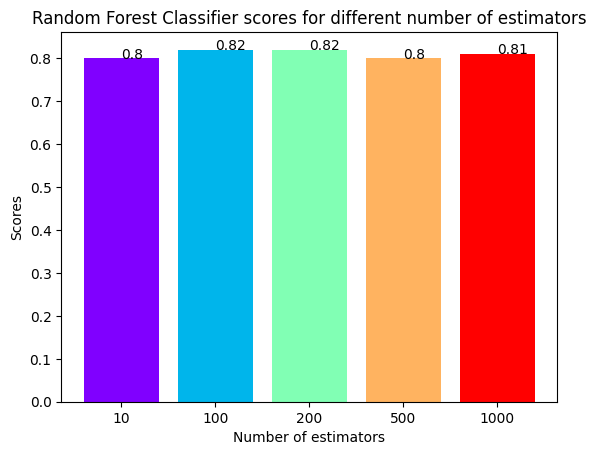

In [37]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
 plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

The maximum score is achieved when the total estimators are 100 or 500.

In [38]:
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[1]*100, [100, 500]))

The score for Random Forest Classifier is 82.0% with [100, 500] estimators.


#Conclusion
In this project, I used Machine Learning to predict whether a person is
suffering from a heart disease. After importing the data, I analysed it using plots. Then, I did generated dummy variables for categorical features and scaled
other features. I then applied four Machine Learning algorithms, K Neighbors Classifier , Support Vector Classifier , Decision Tree Classifier and Random Forest Classifier . I varied parameters across each model to improve their scores. In the end, K Neighbors Classifier achieved the highest score of 87% with 8 nearest neighbors .





